In [1]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
import os
%matplotlib inline
np.set_printoptions(precision=5, suppress=True)

In [2]:
def get_tissue_names(file_name):
    f = open(file_name,'r')
    vec = []
    for line in f:
        line = line.rstrip()
        vec.append(line.split('_1.5')[0])
    return vec

def extract_beta_from_file(file_name):
    f = open(file_name,'r')
    betas = []
    for line in f:
        line = line.rstrip()
        data = line.split('\t')
        betas.append(data[1:])
        
        '''
        print data
        if data[0] == '0':
            betas = []
        if len(data[1:]) != 0:
            temp = data[1:][0].split()
            betas.append(temp)
        '''
    return np.asarray(betas).astype(float)


def get_current_betas(input_dir):
    for file_name in os.listdir(input_dir):
        print file_name
        if file_name.startswith('beta_final'):
            betas = extract_beta_from_file(input_dir + file_name)
    return betas

In [6]:
input_dir = '/Users/farhan_damani/Google Drive/computer_backup/Research/src/rare_variants_shared/src/models/int_model/tissue_spec_tl/softEM_15Tissues_wShrinkage_Lambda1.5.24.16/'
output_dir = '/Users/farhan_damani/Google Drive/computer_backup/Research/src/rare_variants_shared/src/models/int_model/tissue_spec_tl/softEM_15Tissues_wShrinkage_Lambda1.5.24.16/'
tissue_name_file = 'tissue_order.txt'
tissue_names = get_tissue_names(input_dir + tissue_name_file)
betas=get_current_betas(input_dir)
print betas
row,col = betas.shape

beta_c = betas
filer = output_dir + 'betas_' + '.txt'
tissue_filer = output_dir + 'tissues.txt'

beta_child_output.txt
beta_final.txt
beta_output.txt
tissue_order.txt
[[-1.00394 -0.00021 -0.00207 -0.0008  -0.01066 -0.00503  0.00088  0.00559
   0.02141  0.00675  0.00433  0.00014 -0.00269 -0.00204 -0.0007   0.00239
  -0.00342  0.00612 -0.0038   0.00493  0.00205  0.00096]
 [-0.99078 -0.00018 -0.00221  0.0007  -0.00993 -0.00315  0.00247  0.00223
   0.01697  0.00293  0.006    0.00054 -0.0066   0.00328  0.00056  0.00401
  -0.00583  0.00142 -0.00148  0.00402  0.00081  0.00182]
 [-0.98248 -0.00068 -0.00317  0.0046  -0.00993 -0.00421  0.00218  0.00075
   0.01937  0.00555  0.001   -0.00249  0.00258 -0.0013   0.00071 -0.00224
  -0.00017  0.00293 -0.00263  0.00159  0.00659  0.00125]
 [-0.98197  0.00493 -0.00041  0.00044 -0.00939 -0.00138  0.00245 -0.00141
   0.01071  0.00167  0.00641  0.      -0.0104   0.00956 -0.00304  0.00057
  -0.00228  0.00498 -0.00047  0.00088 -0.00129  0.0001 ]
 [-0.9709  -0.00146 -0.00044 -0.00109 -0.00095 -0.00188  0.00073  0.0016
   0.00424  0.00218  0.00311 -0.00013

In [7]:
print beta_c.shape

(15, 22)


In [8]:
Z = linkage(beta_c, method='ward', metric='euclidean')
Z

array([[  5.     ,   7.     ,   0.00976,   2.     ],
       [  6.     ,  10.     ,   0.01012,   2.     ],
       [  1.     ,  11.     ,   0.01092,   2.     ],
       [  2.     ,  16.     ,   0.01162,   3.     ],
       [  0.     ,   9.     ,   0.01587,   2.     ],
       [ 15.     ,  18.     ,   0.01658,   5.     ],
       [  4.     ,  12.     ,   0.01985,   2.     ],
       [ 13.     ,  14.     ,   0.02055,   2.     ],
       [  8.     ,  17.     ,   0.02065,   3.     ],
       [ 20.     ,  23.     ,   0.02305,   8.     ],
       [  3.     ,  24.     ,   0.02688,   9.     ],
       [ 19.     ,  25.     ,   0.03242,  11.     ],
       [ 22.     ,  26.     ,   0.03384,  13.     ],
       [ 21.     ,  27.     ,   0.04329,  15.     ]])

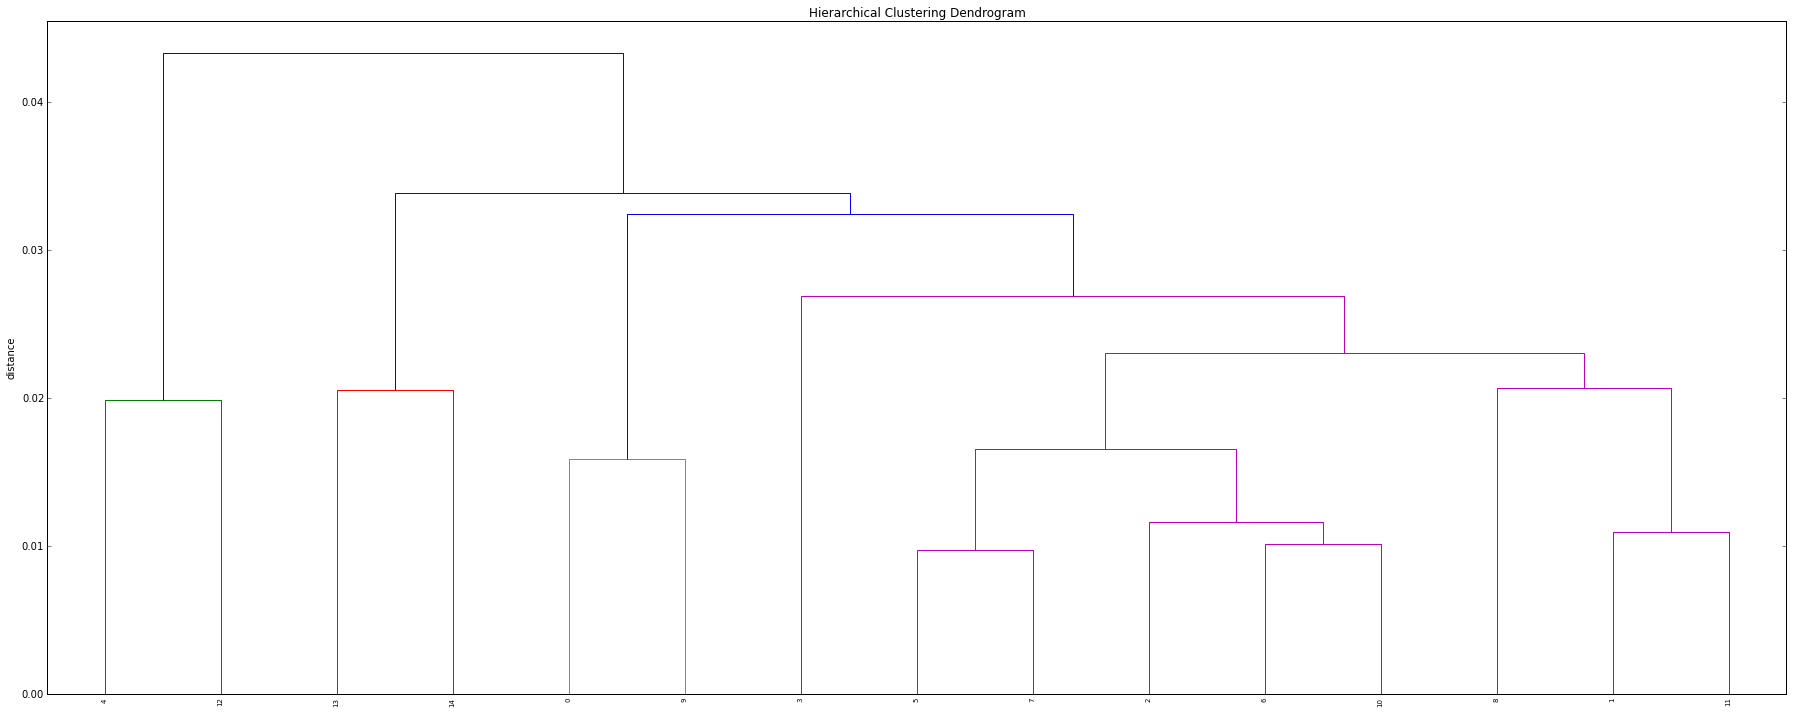

In [11]:
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
#plt.xlabel('Tissue')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=7.,  # font size for the x axis labels
    labels = tissue_names
)
#plt.show()
plt.tight_layout()
plt.savefig('cluster')

In [22]:
tissue_names

['Adipose_Subcutaneous',
 'Artery_Aorta',
 'Artery_Coronary',
 'Brain_Cerebellum',
 'Brain_Cortex',
 'Esophagus_Mucosa',
 'Heart_Atrial_Appendage',
 'Heart_Left_Ventricle',
 'Muscle_Skeletal',
 'Stomach']